In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
data = pd.read_csv('indian_liver_patient.csv')

In [6]:
missing_data= data.isnull().sum()
print (missing_data)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [8]:

# Fill missing values based on column data types
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Numerical columns
        data[column] = data[column].fillna(0)

# Check if all missing values are handled
print(data.isnull().sum())



Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [10]:
print (f"number of duplicate rows: {data.duplicated().sum()}")

number of duplicate rows: 13


In [12]:
# remove duplicates if any 
data = data.drop_duplicates()

In [14]:
data.columns = data.columns.str.strip()

print("\ncolmn names after cleaning: ")
print(data.columns)


colmn names after cleaning: 
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [16]:
numeric_df = data.select_dtypes(include=['number'])

# Check for negative values in numeric columns
columns_with_negatives = [col for col in numeric_df.columns if (numeric_df[col] < 0).any()]

# Print the columns that have negative values
if columns_with_negatives:
    print("Columns with negative values:")
    for col in columns_with_negatives:
        print(col)
else:
    print("No columns contain negative values.")

No columns contain negative values.


In [18]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  
print("\nFirst 5 rows after encoding categorical columns:")
print(data.head())


First 5 rows after encoding categorical columns:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset 

In [20]:
# Normalize/Standardize Numerical Features
scaler = StandardScaler()
numerical_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
                  'Albumin', 'Albumin_and_Globulin_Ratio']
# Apply standardization to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print("\nFirst 5 rows after scaling numerical features:")
print(data.head())


First 5 rows after scaling numerical features:
        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  1.241741       0        -0.418647         -0.493702             -0.427421   
1  1.056874       1         1.210111          1.413923              1.661722   
2  1.056874       1         0.635255          0.919354              0.808927   
3  0.810385       1        -0.370743         -0.387723             -0.447823   
4  1.673096       1         0.092336          0.177500             -0.394778   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                 -0.351482                   -0.314428        0.279290   
1                 -0.086746                   -0.032278        0.923059   
2                 -0.108807                   -0.142385        0.463224   
3                 -0.362513                   -0.307546        0.279290   
4                 -0.290813                   -0.173353        0.739125   

    Albumin  Albumin

In [22]:
# Separate features (X) and target (y)
X = data.drop(columns=['Dataset'])  # Features
y = data['Dataset']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((456, 10), (114, 10), (456,), (114,))

In [24]:
data.to_csv('processed_dataset.csv', index=False)

In [26]:
# Descriptive statistics for numeric attributes
print("\nDescriptive statistics for numeric attributes:")
print(data[numerical_cols].describe())


Descriptive statistics for numeric attributes:
                Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  5.700000e+02     5.700000e+02      5.700000e+02          5.700000e+02   
mean   6.232831e-18    -6.232831e-18     -1.246566e-17          4.986265e-17   
std    1.000878e+00     1.000878e+00      1.000878e+00          1.000878e+00   
min   -2.517211e+00    -4.665521e-01     -4.937018e-01         -9.333852e-01   
25%   -7.301685e-01    -4.026792e-01     -4.583754e-01         -4.723049e-01   
50%    9.297379e-03    -3.707428e-01     -4.230490e-01         -3.417335e-01   
75%    8.103855e-01    -1.152513e-01     -6.978512e-02          2.549865e-02   
max    2.782295e+00     1.144574e+01      6.430271e+00          7.419106e+00   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count              5.700000e+02                5.700000e+02    5.700000e+02   
mean              -2.493132e-17               -6.232831e-18   -4.736952e-

In [28]:
# Another summary statistics of the dataset
print("Mean:\n", data[numerical_cols].mean())
print("\nMedian:\n", data[numerical_cols].median())
print("\nStandard Deviation:\n", data[numerical_cols].std())

Mean:
 Age                           6.232831e-18
Total_Bilirubin              -6.232831e-18
Direct_Bilirubin             -1.246566e-17
Alkaline_Phosphotase          4.986265e-17
Alamine_Aminotransferase     -2.493132e-17
Aspartate_Aminotransferase   -6.232831e-18
Total_Protiens               -4.736952e-16
Albumin                      -3.864355e-16
Albumin_and_Globulin_Ratio    2.742446e-16
dtype: float64

Median:
 Age                           0.009297
Total_Bilirubin              -0.370743
Direct_Bilirubin             -0.423049
Alkaline_Phosphotase         -0.341733
Alamine_Aminotransferase     -0.246691
Aspartate_Aminotransferase   -0.235288
Total_Protiens                0.095355
Albumin                      -0.061483
Albumin_and_Globulin_Ratio   -0.034615
dtype: float64

Standard Deviation:
 Age                           1.000878
Total_Bilirubin               1.000878
Direct_Bilirubin              1.000878
Alkaline_Phosphotase          1.000878
Alamine_Aminotransferase      1.00087


Visualizing numeric attributes with boxplots:


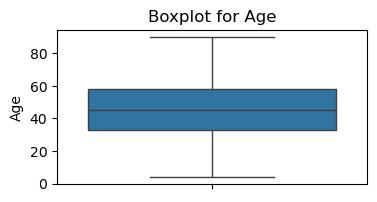

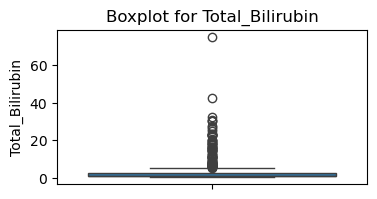

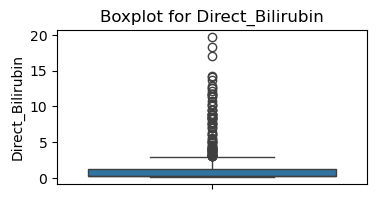

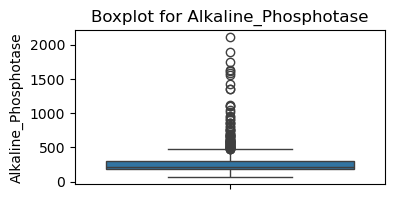

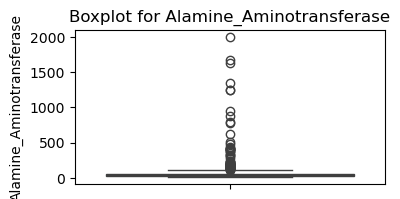

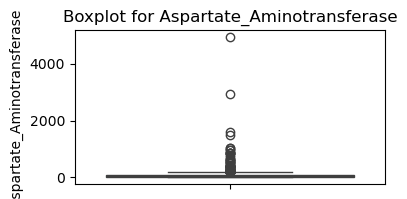

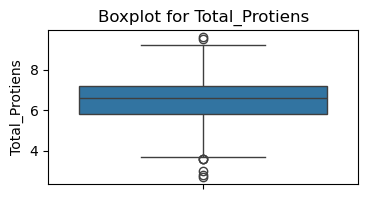

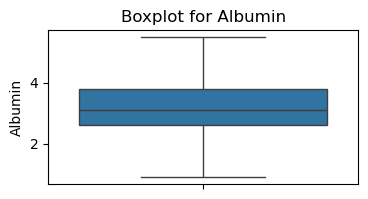

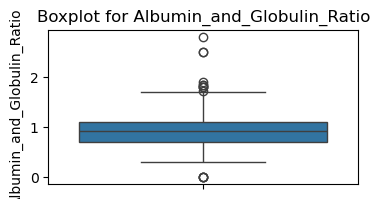

In [30]:
# Boxplot for numeric attributes
print("\nVisualizing numeric attributes with boxplots:")
for column in data[numerical_cols].columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(y=numeric_df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

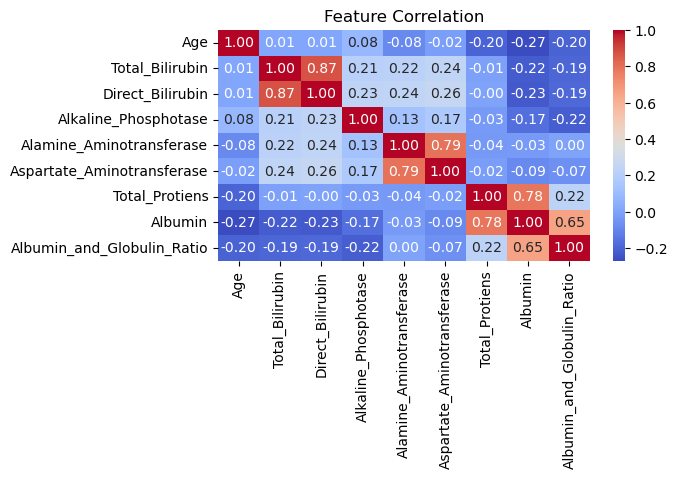

In [32]:
# Correlation heatmap of numeric features
plt.figure(figsize=(6, 3))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [34]:
# Correlation matrix for numeric columns
print("\nCorrelation matrix for numeric attributes:")
print(data[numerical_cols].corr())


Correlation matrix for numeric attributes:
                                 Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011500          0.007050   
Total_Bilirubin             0.011500         1.000000          0.874116   
Direct_Bilirubin            0.007050         0.874116          1.000000   
Alkaline_Phosphotase        0.081673         0.206239          0.234609   
Alamine_Aminotransferase   -0.083383         0.217471          0.237450   
Aspartate_Aminotransferase -0.016753         0.238678          0.258489   
Total_Protiens             -0.197052        -0.008588         -0.000875   
Albumin                    -0.271170        -0.224124         -0.230751   
Albumin_and_Globulin_Ratio -0.202579        -0.193647         -0.187039   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.081673                 -0.083383   
Total_Bilirubin                         0.206239 

In [36]:
# Descriptive statistics for categorical attributes
categorical_columns = ['Gender']  
print("\nDescriptive statistics for categorical attributes:")
for column in categorical_columns:
    if column in data.columns:
        print(f"\nDescriptive statistics for {column}:")
        print(f"Count: {data[column].count()}")
        print(f"Unique: {data[column].nunique()}")
        print(f"Top: {data[column].mode()[0]}")
        print(f"Freq: {data[column].value_counts().iloc[0]}")


Descriptive statistics for categorical attributes:

Descriptive statistics for Gender:
Count: 570
Unique: 2
Top: 1
Freq: 430


In [38]:
# Value counts for categorical attributes
print("\nValue counts for categorical attributes:")
for column in categorical_columns:
    if column in data.columns:
        print(f"\n{column} value counts:")
        print(data[column].value_counts())


Value counts for categorical attributes:

Gender value counts:
Gender
1    430
0    140
Name: count, dtype: int64



Visualizing value counts for categorical attributes:


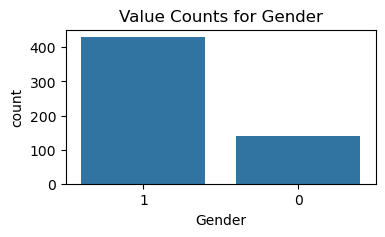

In [40]:
# Visualizing value counts for categorical attributes
print("\nVisualizing value counts for categorical attributes:")
for column in categorical_columns:
    if column in data.columns:
        plt.figure(figsize=(4, 2))
        sns.countplot(x=data[column], order=data[column].value_counts().index)
        plt.title(f"Value Counts for {column}")
        plt.show()

In [42]:
outliers_col = ['Total_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']


# Initial dataset shape
print("Initial Dataset Shape: ", data.shape)

# Initialize a copy of the data
data_no_outliers = data.copy()

for column in outliers_col:
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers 
    data_no_outliers = data_no_outliers[
        (data_no_outliers[column] >= lower_bound) &
        (data_no_outliers[column] <= upper_bound)
    ]

# After IQR-based outlier removal
print("Dataset Shape After Outlier Removal: ", data_no_outliers.shape)

# Count rows removed
num_outliers_removed = data.shape[0] - data_no_outliers.shape[0]
print(f"Total number of rows removed due to outliers: {num_outliers_removed}")


Initial Dataset Shape:  (570, 11)
Dataset Shape After Outlier Removal:  (435, 11)
Total number of rows removed due to outliers: 135


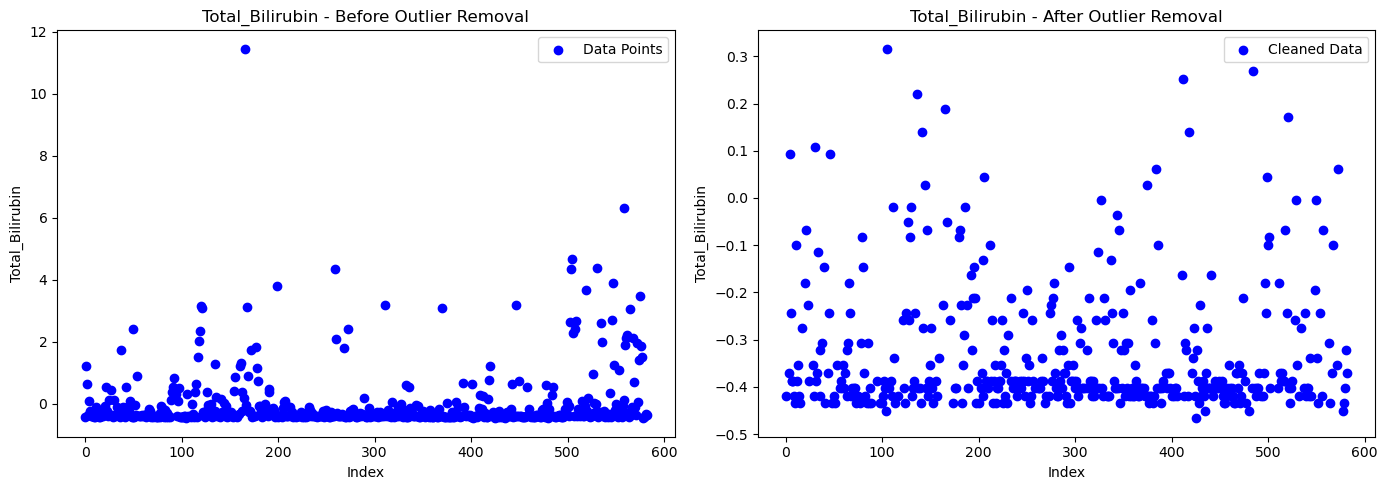

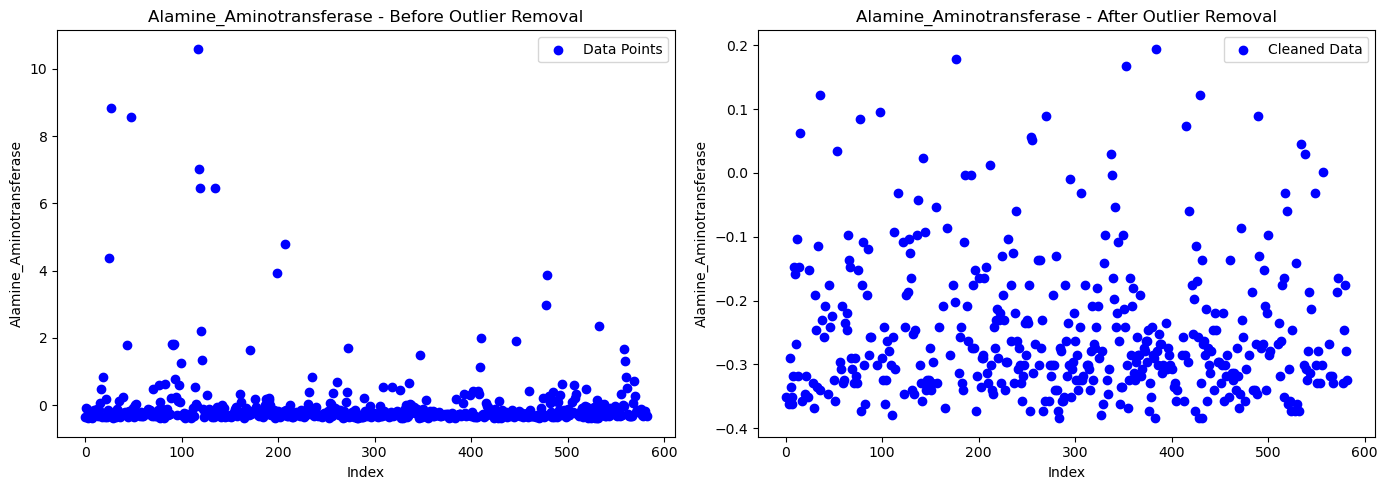

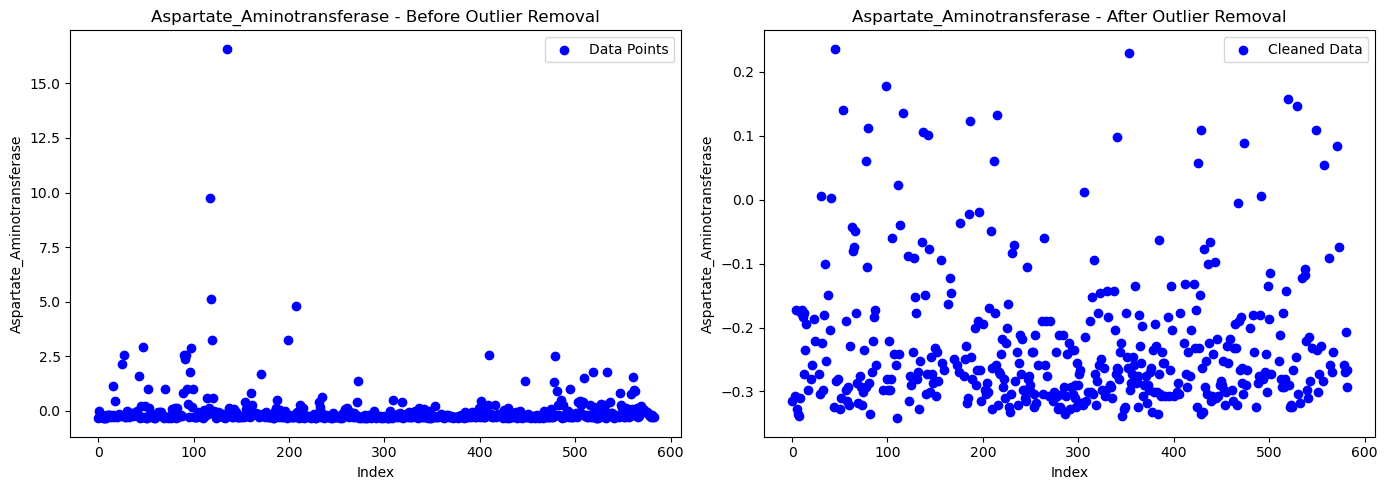

In [44]:
for column in outliers_col:

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Before outliers removal
    ax[0].scatter(data.index, data[column], c='blue', label='Data Points')
    ax[0].set_title(f'{column} - Before Outlier Removal')
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel(column)
    ax[0].legend()

    # After outliers removal
    ax[1].scatter(data_no_outliers.index, data_no_outliers[column], c='blue', label='Cleaned Data')
    ax[1].set_title(f'{column} - After Outlier Removal')
    ax[1].set_xlabel('Index')
    ax[1].set_ylabel(column)
    ax[1].legend()

    plt.tight_layout()
    plt.show()


#task5 LR

In [47]:
# Separate features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
lr = LogisticRegression(max_iter=100)
parameters_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(lr, parameters_lr, cv=5)
grid_lr.fit(X_train, y_train)
# print("Logistic Regression Best Parameters:", grid_lr.best_params_)
# print("Logistic Regression Classification Report:")
# print(classification_report(y_test, grid_lr.predict(X_test)))
lrPredict = grid_lr.predict(X_test)


In [85]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
parameters_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
grid_dt = GridSearchCV(dt, parameters_dt, cv=5)
grid_dt.fit(X_train, y_train)
# print("Decision Tree Best Parameters:", grid_dt.best_params_)
# print("Decision Tree Classification Report:")
# print(classification_report(y_test, grid_dt.predict(X_test)))
dtPredict = grid_dt.predict(X_test)



In [87]:
# Random Forest
rf = RandomForestClassifier()
parameters_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(rf, parameters_rf, cv=5)
grid_rf.fit(X_train, y_train)
# print("Random Forest Best Parameters:", grid_rf.best_params_)
# print("Random Forest Classification Report:")
# print(classification_report(y_test, grid_rf.predict(X_test)))
rfPredict = grid_rf.predict(X_test)

In [79]:
# Get performance metrics for all models
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# models = {
#     'Logistic Regression': grid_lr,
#     'Decision Tree': grid_dt,
#     'Random Forest': grid_rf
# }

# # Function to print detailed results for each model
# def print_model_results(model_name, model, X_test, y_test):
#     print(f"{model_name} Classification Report:")
#     print(classification_report(y_test, model.predict(X_test)))
#     print(f"{model_name} Confusion Matrix:")
#     print(confusion_matrix(y_test, model.predict(X_test)))

# # Print results for all models
# for model_name, model in models.items():
#     print_model_results(model_name, model, X_test, y_test)

# # Compare the accuracy of all models
# accuracies = {
#     model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in models.items()
# }

# # Print accuracy comparison
# print("\nAccuracy Comparison:")
# for model_name, accuracy in accuracies.items():
#     print(f"{model_name}: {accuracy * 100:.2f}%")

In [91]:
#task 5 

In [97]:
# Results for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lrPredict))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lrPredict))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lrPredict) * 100:.2f}%")
print("\n" + "-"*50)

# Results for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtPredict))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dtPredict))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dtPredict) * 100:.2f}%")
print("\n" + "-"*50)

# Results for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rfPredict))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rfPredict))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rfPredict) * 100:.2f}%")
print("\n" + "-"*50)

# Accuracy comparison
print("Accuracy Comparison:")
print(f"Logistic Regression: {accuracy_score(y_test, lrPredict) * 100:.2f}%")
print(f"Decision Tree: {accuracy_score(y_test, dtPredict) * 100:.2f}%")
print(f"Random Forest: {accuracy_score(y_test, rfPredict) * 100:.2f}%")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        85
           2       0.39      0.24      0.30        29

    accuracy                           0.71       114
   macro avg       0.58      0.56      0.56       114
weighted avg       0.67      0.71      0.69       114

Logistic Regression Confusion Matrix:
[[74 11]
 [22  7]]
Logistic Regression Accuracy: 71.05%

--------------------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.85      0.80        85
           2       0.35      0.24      0.29        29

    accuracy                           0.69       114
   macro avg       0.56      0.54      0.55       114
weighted avg       0.66      0.69      0.67       114

Decision Tree Confusion Matrix:
[[72 13]
 [22  7]]
Decision Tree Accuracy: 69.30%

-------------------------------------